STEP 1 Scraping Data


Importing Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Initializing scraping loop

In [ ]:
url='https://www.lamudi.co.id/buy/'

In [ ]:
request=requests.get(url).text

In [ ]:
soup=BeautifulSoup(request,'html5lib')

In [ ]:
table=soup.find_all('div',{'class': 'ListingCell-AllInfo ListingUnit'})

In [ ]:
a=[]
for rows in table:
  col= rows.find_all('a')
  cell={}
  cell['Location']= col[1].text.replace(' ','').replace('\n','').strip()
  cell['Price']=col[3].text.replace(' ','').replace('\n','').strip()
  a.append(cell)

In [ ]:
for n in np.arange(2,100):
  url1='https://www.lamudi.co.id/buy/?page={}'.format(n)
  r=requests.get(url1).text
  s=BeautifulSoup(r,'html5lib')
  t=s.find_all('div',{'class': 'ListingCell-AllInfo ListingUnit'})
  for rows in t:
    col= rows.find_all('a')
    cell={}
    cell['Location']= col[1].text.replace(' ','').replace('\n','').strip()
    cell['Price']=col[3].text.replace(' ','').replace('\n','').strip()
    a.append(cell)

In [ ]:
df=pd.DataFrame(a)

In [ ]:
area=[]
for loc in df.Location:
  b=loc.split(',')
  c=b[-1]
  area.append(c)
 



In [ ]:
df['Area']=area

**Initial DataFrame**

In [ ]:
df.head()

Location  ...              Area
0       JlCisarantenArcamanikCisarantenKulon,Bandung  ...           Bandung
1                          TanahKusir,JakartaSelatan  ...    JakartaSelatan
2                            Cilandak,JakartaSelatan  ...    JakartaSelatan
3  Indonesia,JakartaSelatan,JalanBangkaIIIBangka,...  ...    JakartaSelatan
4                           Serpong,TangerangSelatan  ...  TangerangSelatan

[5 rows x 3 columns]

Listing locations from lamudi are very inconsistent. Some provide the detailed address and some only displays the City.

I believe that analyzing the data using a city basis will yield a better generalization.

**Evaluating Area column using excel and write its corrections**

In [ ]:
df.to_csv('area.csv')

In [ ]:
files.download('area.csv')

**Uploading corrections**

**Replaceing the erroneous area name** 

In [ ]:
files.upload('area (2).csv')

In [ ]:
corrected=pd.read_csv('area (2).csv',sep=';').drop('a',axis=1)

In [ ]:
corrected.head()

from               to
0         Bandung          Bandung
1    CilebutBogor            Bogor
2  JakartaSelatan  Jakarta Selatan
3        Makassar         Makassar
4       Tangerang        Tangerang

In [ ]:
correctkey=[]
for area,correct in zip(corrected['from'],corrected.to):
  key={}
  key['{}'.format(area)]=correct
  correctkey.append(key)

In [ ]:
key={}
for d in correctkey:
  key.update(d)

In [ ]:
df.Area.replace(key,inplace=True)

In [ ]:
df.Area.unique()

array(['Bandung', 'Jakarta Selatan', 'Tangerang', 'Makassar', 'Bekasi',
       'Bogor', 'Cianjur', 'Palembang', 'JlteluklangsaciangsanaBogor',
       'JlteluklangsacibuburBogor', 'Sleman', 'Depok',
       'MonjaliYogyakarta', 'Bantul', 'Jakarta Timur', 'Malang', 'Solo',
       'Gianyar', 'Badung', 'Sidoarjo', 'Purworejo', 'Kediri',
       'Jakarta Barat', 'Serang', 'Gresik', 'Denpasar', 'Manggarai',
       'Semarang', 'Klaten', 'Buleleng', 'Surabaya', 'Bandar Lampung',
       'Jakarta Pusat', 'Medan', 'Serdang', 'Karawang', 'Gunung Kidul',
       'Magelang', 'Kulon Progo', 'Yogyakarta', 'Pesawaran',
       'sudirmanBandung', 'Pekanbaru', 'Sukoharjo', 'Jakarta Utara',
       'Batam', 'Pasuruan', 'Salatiga', 'Banjar', 'Purbalingga',
       'Pekalongan', 'Batu', 'Banyumas', 'Subang', 'Cirebon',
       'JawaBarat46151Tasikmalaya', 'Maros', 'Boyolali', 'Sukabumi',
       'Gowa', 'Tasikmalaya', 'Prabumulih', 'Pasar2ringroadMedan',
       'Banda Aceh', 'Sumedang', 'Wonogiri', 'Lamongan', 'Teg

In [ ]:
key2={'JlteluklangsaciangsanaBogor':'Bogor','JlteluklangsacibuburBogor':'Bogor','MonjaliYogyakarta':'Yogyakarta' ,'JawaBarat46151Tasikmalaya':'Tasikmalaya',
 'Pasar2ringroadMedan':'Medan','Jl.LamKutaBandaAceh':'Banda Aceh','IndonesiaYogyakarta':'Yogyakarta','JalanDesaSukamelangSubang':'Subang','MusiBanyuasin':'Banyuasin',
 'KecamatanHamparanPerakDeliSerdang':'Serdang','JntanjungdurenselatanJakartaBarat':'Jakarta Barat','jalangedongsarimumbulBypassNusaduabenoabadungbaliBadung':'Badung',
 'SIMPANGSULFATUTARAMalang':'Malang','sudirmanBandung':'Bandung'}

In [ ]:
df.Area.replace(key2,inplace=True)

In [ ]:
df.Area.unique()

array(['Bandung', 'Jakarta Selatan', 'Tangerang', 'Makassar', 'Bekasi',
       'Bogor', 'Cianjur', 'Palembang', 'Sleman', 'Depok', 'Yogyakarta',
       'Bantul', 'Jakarta Timur', 'Malang', 'Solo', 'Gianyar', 'Badung',
       'Sidoarjo', 'Purworejo', 'Kediri', 'Jakarta Barat', 'Serang',
       'Gresik', 'Denpasar', 'Manggarai', 'Semarang', 'Klaten',
       'Buleleng', 'Surabaya', 'Bandar Lampung', 'Jakarta Pusat', 'Medan',
       'Serdang', 'Karawang', 'Gunung Kidul', 'Magelang', 'Kulon Progo',
       'Pesawaran', 'Pekanbaru', 'Sukoharjo', 'Jakarta Utara', 'Batam',
       'Pasuruan', 'Salatiga', 'Banjar', 'Purbalingga', 'Pekalongan',
       'Batu', 'Banyumas', 'Subang', 'Cirebon', 'Tasikmalaya', 'Maros',
       'Boyolali', 'Sukabumi', 'Gowa', 'Prabumulih', 'Banda Aceh',
       'Sumedang', 'Wonogiri', 'Lamongan', 'Tegal', 'Lebak', 'Jambi',
       'Jember', 'Cimahi', 'Magetan', 'Ciamis', 'Karanganyar', 'Tabanan',
       'Manado', 'Pandeglang', 'Asahan', 'Mojokerto', 'Minahasa',
       'In

**DataFrame after correcting "Area" column**





In [ ]:
df

Location  ...             Area
0          JlCisarantenArcamanikCisarantenKulon,Bandung  ...          Bandung
1                             TanahKusir,JakartaSelatan  ...  Jakarta Selatan
2                               Cilandak,JakartaSelatan  ...  Jakarta Selatan
3     Indonesia,JakartaSelatan,JalanBangkaIIIBangka,...  ...  Jakarta Selatan
4                              Serpong,TangerangSelatan  ...        Tangerang
...                                                 ...  ...              ...
2965  Indonesia,16166,BogorKota,TamanSariPersadaTana...  ...            Bogor
2966                    CISOKATANGERANGCisoka,Tangerang  ...        Tangerang
2967                                 Cipondoh,Tangerang  ...        Tangerang
2968       Indonesia,Sidoarjo,GedanganGedangan,Sidoarjo  ...         Sidoarjo
2969  Jl.Nagrak,Kec.Cangkuang,Bandung,JawaBaratCangk...  ...          Bandung

[2970 rows x 3 columns]

**Collecting Latitude and Longitude values**

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geocoder= Nominatim()

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
latlist=[]
lonlist=[]
for area in df.Area.unique():
  query='{},Indonesia'.format(area)
  geolocator=geocoder.geocode(query)
  lat=geolocator.latitude
  lon=geolocator.longitude
  lonlist.append({area:lon})
  latlist.append({area:lat})

In [ ]:
londict={}
for d1 in lonlist:
  londict.update(d1)

In [ ]:
latdict={}
for d2 in latlist:
  latdict.update(d2)

In [ ]:
df['Longitude']=df.Area
df['Latitude']=df.Area

In [ ]:
df.Longitude.replace(londict,inplace=True)
df.Latitude.replace(latdict,inplace=True)

**Setting up Checkpoint in CSV**

In [ ]:
df.to_csv('processed_data.csv')

In [ ]:
files.download('processed_data.csv')

STEP 2 Data Cleaning

In [ ]:
files.upload()

In [ ]:
df=pd.read_csv('processed_data.csv')

In [ ]:
df

Unnamed: 0  ...  Latitude
0              0  ... -6.934469
1              1  ... -6.283818
2              2  ... -6.283818
3              3  ... -6.283818
4              4  ... -6.176031
...          ...  ...       ...
2965        2965  ... -6.596299
2966        2966  ... -6.176031
2967        2967  ... -6.176031
2968        2968  ... -7.455962
2969        2969  ... -6.934469

[2970 rows x 6 columns]

In [ ]:
price_cleaned=[]
for i,n in enumerate(df.Price):
  try:
    a=n.replace('Rp','').replace('.','')
    price_cleaned.append(int(a))
  except:
    a=0
    price_cleaned.append(int(a))

In [ ]:
df['Price']=price_cleaned

In [ ]:
df.drop(df[df.Price==0].index,axis=0,inplace=True)

In [ ]:
df.drop(columns=['index','Unnamed: 0'],axis=1,inplace=True )

**Cleaned DataFrame**

In [ ]:
df

Location  ...  Latitude
0          JlCisarantenArcamanikCisarantenKulon,Bandung  ... -6.934469
1                             TanahKusir,JakartaSelatan  ... -6.283818
2                               Cilandak,JakartaSelatan  ... -6.283818
3     Indonesia,JakartaSelatan,JalanBangkaIIIBangka,...  ... -6.283818
4                              Serpong,TangerangSelatan  ... -6.176031
...                                                 ...  ...       ...
2940  Indonesia,16166,BogorKota,TamanSariPersadaTana...  ... -6.596299
2941                    CISOKATANGERANGCisoka,Tangerang  ... -6.176031
2942                                 Cipondoh,Tangerang  ... -6.176031
2943       Indonesia,Sidoarjo,GedanganGedangan,Sidoarjo  ... -7.455962
2944  Jl.Nagrak,Kec.Cangkuang,Bandung,JawaBaratCangk...  ... -6.934469

[2945 rows x 5 columns]

In [ ]:
area=pd.DataFrame(df.Area.value_counts())

There are a lot of area that has only one or two listings. 

I will filter out those area because I think it be a noise for clustering.

**Dropping areas with less than 3 listings**

In [ ]:
area.drop(area[area.Area<3].index,axis=0,inplace=True)

In [ ]:
area.reset_index(inplace=True)

In [ ]:
area.rename(columns={'index':'Location','Area':'Listings'},inplace=True)

In [ ]:
area

Location  Listings
0         Tangerang       402
1   Jakarta Selatan       330
2            Bekasi       259
3           Bandung       240
4             Bogor       229
..              ...       ...
62           Ciamis         3
63           Madiun         3
64         Lamongan         3
65          Cilegon         3
66            Maros         3

[67 rows x 2 columns]

**Collecting Latitude and Longitudes for the grouped area**

In [ ]:
latlist=[]
lonlist=[]
for area in area.Location:
  query='{},Indonesia'.format(area)
  geolocator=geocoder.geocode(query)
  lat=geolocator.latitude
  lon=geolocator.longitude
  lonlist.append({area:lon})
  latlist.append({area:lat})

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geocoder= Nominatim()

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
latdict={}
for d2 in latlist:
  latdict.update(d2)

In [ ]:
londict={}
for d1 in lonlist:
  londict.update(d1)

In [ ]:
area['Latitude']=area.Location
area['Longitude']=area.Location
area.Latitude.replace(latdict,inplace=True)
area.Longitude.replace(londict,inplace=True)

In [ ]:
area.head()

Location  Listings  Latitude   Longitude
0        Tangerang       402 -6.176031  106.638447
1  Jakarta Selatan       330 -6.283818  106.804863
2           Bekasi       259 -6.234986  106.994544
3          Bandung       240 -6.934469  107.604954
4            Bogor       229 -6.596299  106.797242

In [ ]:
price_meandict=dict(df.groupby('Area')['Price'].mean())

In [ ]:
area['Mean_Price']=area.Location

In [ ]:
area.Mean_Price.replace(price_meandict,inplace=True)

In [ ]:
area

Location  Listings  Latitude   Longitude    Mean_Price
0         Tangerang       402 -6.176031  106.638447  4.545191e+09
1   Jakarta Selatan       330 -6.283818  106.804863  9.785526e+09
2            Bekasi       259 -6.234986  106.994544  5.438207e+09
3           Bandung       240 -6.934469  107.604954  2.390222e+09
4             Bogor       229 -6.596299  106.797242  4.291715e+09
..              ...       ...       ...         ...           ...
62           Ciamis         3 -7.326661  108.353095  3.006500e+10
63           Madiun         3 -7.611888  111.673193  6.186667e+08
64         Lamongan         3 -7.122912  112.328216  2.275000e+08
65          Cilegon         3 -6.017389  106.053769  3.258333e+08
66            Maros         3 -4.965502  119.692843  1.700000e+08

[67 rows x 5 columns]

**STEP 3 Venue Data Collection**

**Getting nearest venue data from foursquare API**

https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}

In [ ]:
client_id='B51MHKPXL1EOZ1CLLODWAGKZBZ1KLVO1BHQ5HM404QALFB3W'
client_secret='FSKXHQBNJJPBOGDSI0VFKMGI2VKNBD0O3N5DMOFYRZF0BBY4'

I choose 2019 version because in 2020 many of the venue closed because of Covid-19

In [ ]:
version=20190131

In [ ]:
import requests

Collecting the categories of the venues around the city.

I set the limit for the venue as 100

In [ ]:
cell={}
for location,lat,lon in zip(area.Location,area.Latitude,area.Longitude):
  url1='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&limit=100'.format(client_id,client_secret,v,lat,lon)
  result=requests.get(url1).json()
  prelist=[]
  for n in range(len(result['response']['groups'][0]['items'])):
    cat=result['response']['groups'][0]['items'][n]['venue']['categories'][0]['name']
    prelist.append(cat)
  cell[location]=Counter(prelist)

In [ ]:
cell

{'Badung': Counter({'Breakfast Spot': 1,
          'Buffet': 1,
          'Coffee Shop': 1,
          'Food': 1,
          'Food Truck': 2,
          'Garden Center': 1,
          'Indonesian Restaurant': 1,
          'Market': 1,
          'Shopping Plaza': 1}),
 'Banda Aceh': Counter({'Bakery': 3,
          'Bookstore': 1,
          'Breakfast Spot': 5,
          'Café': 2,
          'Coffee Shop': 11,
          'Convenience Store': 2,
          'Department Store': 2,
          'Diner': 1,
          'Electronics Store': 1,
          'Event Space': 1,
          'Fast Food Restaurant': 2,
          'Field': 1,
          'Food Court': 1,
          'Food Truck': 1,
          'Fried Chicken Joint': 1,
          'Gift Shop': 2,
          'Gym / Fitness Center': 3,
          'History Museum': 1,
          'Hot Dog Joint': 1,
          'Hotel': 2,
          'Ice Cream Shop': 2,
          'Indonesian Meatball Place': 5,
          'Indonesian Restaurant': 5,
          'Intersection': 1,
      

In [ ]:
venues=pd.DataFrame(cell).transpose()

In [ ]:
final_dataset=area.merge(venues, left_on=area.Location, right_on=venues.index).fillna(0)

In [ ]:
final_dataset[final_dataset.Location=='Buleleng'].index

Int64Index([49], dtype='int64')

Below is some additional changes that I made in the final review before submitting.

There are several locations that have erroneous coordinates because they share the same name with another area.

In [ ]:
final_dataset.loc[final_dataset[final_dataset.Location=='Buleleng'].index,['Latitude']]= -8.121376
final_dataset.loc[final_dataset[final_dataset.Location=='Buleleng'].index,['Longitude']]=  115.078180
final_dataset.loc[final_dataset[final_dataset.Location=='Manggarai'].index,['Latitude']]= -8.6688
final_dataset.loc[final_dataset[final_dataset.Location=='Manggarai'].index,['Longitude']]=  120.0665
final_dataset.loc[final_dataset[final_dataset.Location=='Serdang'].index,['Latitude']]= -6.026374
final_dataset.loc[final_dataset[final_dataset.Location=='Serdang'].index,['Longitude']]= 106.089422
final_dataset.loc[final_dataset[final_dataset.Location=='Indramayu'].index,['Latitude']]=	-6.39269460
final_dataset.loc[final_dataset[final_dataset.Location=='Indramayu'].index,['Longitude']]=  108.28754480
final_dataset.loc[final_dataset[final_dataset.Location=='Badung'].index,['Latitude']]= -8.739184
final_dataset.loc[final_dataset[final_dataset.Location=='Badung'].index,['Longitude']]= 115.171127


Dataset is done

Lets save the csv to make sure that the data do not change

In [ ]:
final_dataset.to_csv('final_dataset.csv')

In [ ]:
files.download('final_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Load CSV back**

In [ ]:
from google.colab import files
files.upload()

Saving final_dataset.csv to final_dataset.csv


{'final_dataset.csv': b",Unnamed: 0,key_0,Location,Listings,Latitude,Longitude,Mean_Price,Fast Food Restaurant,Coffee Shop,Caf\xc3\xa9,Noodle House,Donut Shop,Indonesian Meatball Place,Bookstore,Soup Place,Bubble Tea Shop,Movie Theater,Hardware Store,Restaurant,Asian Restaurant,Basketball Stadium,Japanese Restaurant,Train Station,Seafood Restaurant,College Library,Soccer Stadium,Indonesian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Food,Shopping Mall,Light Rail Station,Health & Beauty Service,Food Truck,Steakhouse,Art Gallery,French Restaurant,Smoke Shop,Park,Furniture / Home Store,Convenience Store,Stadium,Bridge,Bakery,Pet Store,Monument / Landmark,Museum,Field,Hotel,Photography Lab,Bus Line,Outdoor Sculpture,Botanical Garden,High School,Bowling Alley,Pharmacy,Garden,Pool,Fried Chicken Joint,Food & Drink Shop,Food Court,Science Museum,Playground,Chinese Restaurant,Supermarket,Rock Club,Sculpture Garden,Dumpling Restaurant,Nature Preserve,Grocery Store,Department Store,Ju

In [ ]:
final_dataset=pd.read_csv('final_dataset.csv')

**Let's plot venue count per category**

In [ ]:
venues=final_dataset.iloc[:,8:]

In [ ]:
venues_number=pd.DataFrame(venues.transpose().sum(axis=1),columns=['Sum']).sort_values(by=['Sum'],ascending=False)

In [ ]:
venues_number.shape

(210, 1)

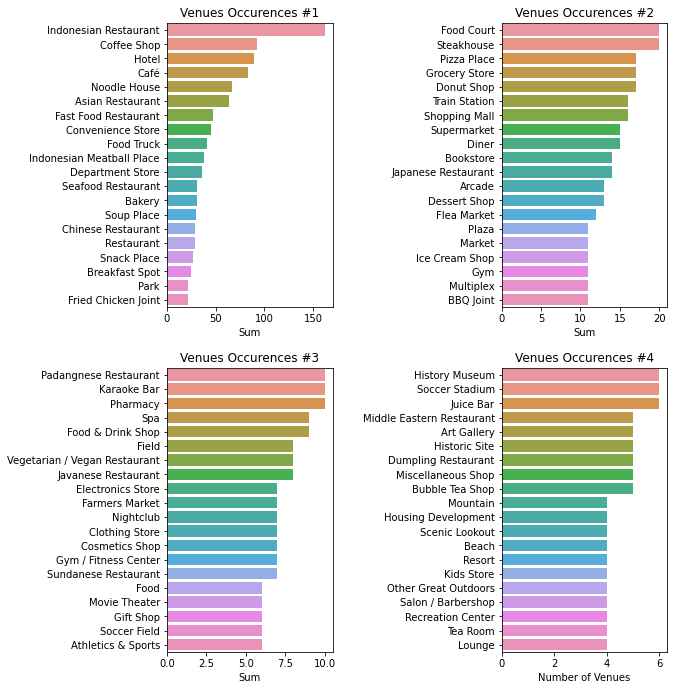

In [ ]:
fig,ax= plt.subplots(2,2,figsize=(10,10))
ax1=sns.barplot(y=venues_number.index[0:20], x=venues_number['Sum'][0:20],orient='h',ax=ax[0,0])
ax2=sns.barplot(y=venues_number.index[20:40], x=venues_number['Sum'][20:40],orient='h',ax=ax[0,1])
ax3=sns.barplot(y=venues_number.index[40:60], x=venues_number['Sum'][40:60],orient='h',ax=ax[1,0])
ax4=sns.barplot(y=venues_number.index[60:80], x=venues_number['Sum'][60:80],orient='h',ax=ax[1,1])

fig.tight_layout(pad=3)
plt.xlabel('Number of Venues')
ax1.title.set_text('Venues Occurences #1')
ax2.title.set_text('Venues Occurences #2')
ax3.title.set_text('Venues Occurences #3')
ax4.title.set_text('Venues Occurences #4')

**Lets plot the venue per location**

In [ ]:
plot_df=pd.DataFrame([final_dataset.iloc[:,8:].sum(axis=1),final_dataset.Location]).transpose()

In [ ]:
plot_df.sort_values(by=['Unnamed 0'],ascending=False, inplace=True)

Text(0.5, 1.0, 'Venues per Location')

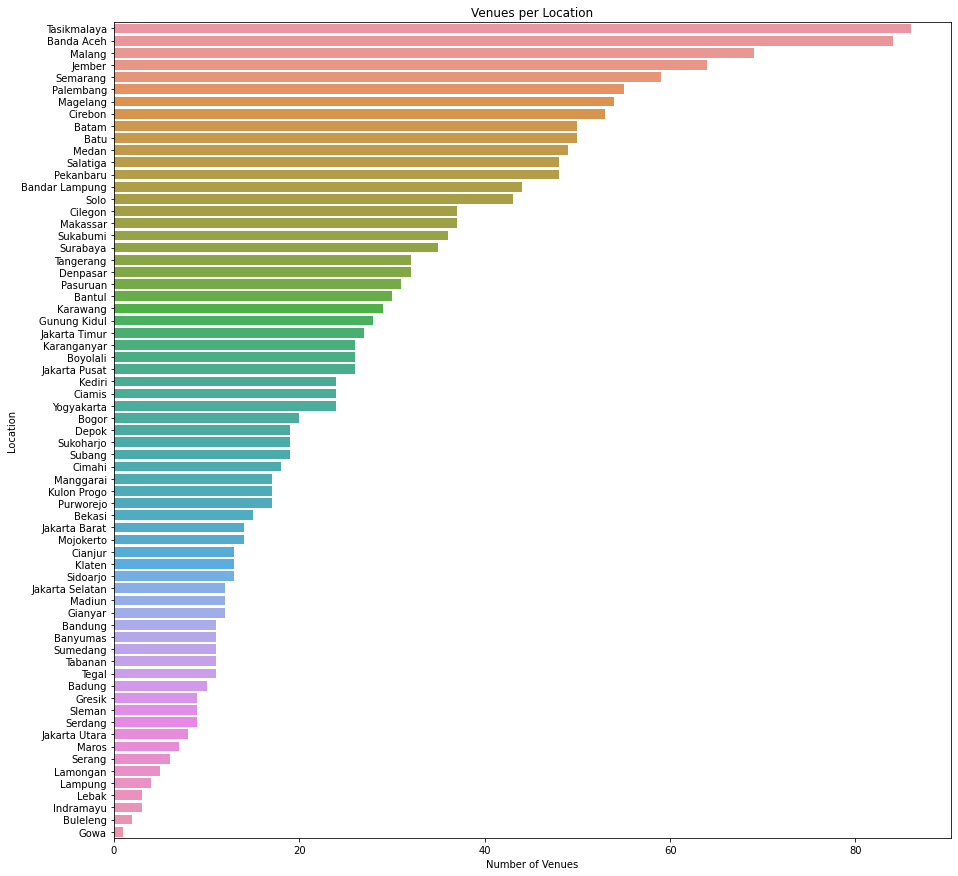

In [ ]:
fig,ax= plt.subplots(1,1,figsize=(15,15))
f=sns.barplot(y=plot_df['Location'], x=plot_df['Unnamed 0'],orient='h',ax=ax)
plt.xlabel('Number of Venues')
plt.title('Venues per Location')


As we can see, there is a discrepancy in the number of venues collected.

So it is best to cluster the data before processing it further.


**STEP 4 Clustering**

In [ ]:
final_dataset.head()

Unnamed: 0  Unnamed: 0.1  ... Harbor / Marina Music School
0           0             0  ...             0.0          0.0
1           1             1  ...             0.0          0.0
2           2             2  ...             0.0          0.0
3           3             3  ...             0.0          0.0
4           4             4  ...             0.0          0.0

[5 rows x 218 columns]

In [ ]:
final_dataset.iloc[:,8:]

Fast Food Restaurant  Coffee Shop  ...  Harbor / Marina  Music School
0                    2.0          2.0  ...              0.0           0.0
1                    0.0          1.0  ...              0.0           0.0
2                    1.0          0.0  ...              0.0           0.0
3                    0.0          0.0  ...              0.0           0.0
4                    1.0          1.0  ...              0.0           0.0
..                   ...          ...  ...              ...           ...
62                   1.0          0.0  ...              0.0           0.0
63                   0.0          0.0  ...              0.0           0.0
64                   2.0          0.0  ...              0.0           0.0
65                   2.0          0.0  ...              0.0           0.0
66                   0.0          0.0  ...              0.0           0.0

[67 rows x 210 columns]

**Setting up variables and price**

In [ ]:
variables=final_dataset.iloc[:,8:]

In [ ]:
variables.head()

Fast Food Restaurant  Coffee Shop  ...  Harbor / Marina  Music School
0                   2.0          2.0  ...              0.0           0.0
1                   0.0          1.0  ...              0.0           0.0
2                   1.0          0.0  ...              0.0           0.0
3                   0.0          0.0  ...              0.0           0.0
4                   1.0          1.0  ...              0.0           0.0

[5 rows x 210 columns]

In [ ]:
price=final_dataset.Mean_Price

In [ ]:
from sklearn.cluster import KMeans

**Searching for best number of cluster**




In [ ]:
inertia=[]
for n in range(1,20):
  model=KMeans(n_clusters=n,random_state=50).fit(variables)
  inertia.append(model.inertia_)

Text(0, 0.5, 'Inertia')

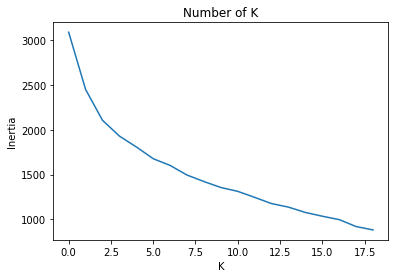

In [ ]:
plt.plot(inertia)
plt.title('Number of K')
plt.xlabel('K')
plt.ylabel('Inertia')

In [ ]:
modelK=KMeans(n_clusters=8,random_state=50).fit(variables)

In [ ]:
from collections import Counter

In [ ]:
counter_clust=pd.DataFrame.from_dict(Counter(modelK.labels_),orient='index').reset_index()
counter_clust.rename(columns={'index':'Cluster',0:'Number of Members'},inplace=True)
counter_clust.sort_values(by=['Cluster'],inplace=True)
counter_clust['Color']=['Purple','Dark Blue','Light Blue','Cyan','Light Green','Dark Yellow','Orange','Red']
counter_clust

Cluster  Number of Members        Color
1        0                 34       Purple
6        1                  1    Dark Blue
0        2                 10   Light Blue
5        3                  5         Cyan
3        4                  1  Light Green
7        5                  1  Dark Yellow
4        6                  3       Orange
2        7                 12          Red

There are 8 Clusters.

Three of which has ten or more members

**Lets visualize the clusters in the worldmap**

In [ ]:
import folium

In [ ]:
final_dataset['Cluster']=modelK.labels_

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
c1 = np.arange(8)
c2 = [i + c1 + (i*c1)**2 for i in range(8)]
colors_array = cm.rainbow(np.linspace(0, 1, len(c2)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


In [ ]:
rainbow

['#8000ff',
 '#386df9',
 '#12c8e6',
 '#5af8c8',
 '#a4f89f',
 '#ecc86f',
 '#ff6d38',
 '#ff0000']

In [ ]:
IndoLat=6.1750
IndoLon=106.8283

**Plot Process**

In [ ]:
map=folium.Map([IndoLat-10,IndoLon+5],zoom_start=6)
for name,lat,lon, cluster in zip(final_dataset.Location,final_dataset.Latitude, final_dataset.Longitude, final_dataset.Cluster):
  labels=folium.Popup('{}\nCluster{}'.format(name,cluster),parse_html=True)
  folium.CircleMarker([lat,lon],fill=True,color=rainbow[cluster],fill_opacity=0.7,popup=labels).add_to(map)


In [ ]:
clutitle = 'Cluster Map'
clutitle_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(clutitle)  
map.get_root().html.add_child(folium.Element(clutitle_html))


Purple = Cluster 0

Dark Blue =Cluster 1

Light Blue = Cluster 2

Cyan = Cluster 3

Light Green = Cluster 4

Dark Yellow = Cluster 5

Orange= Cluster 6

Red= Cluster 7

In [ ]:
map

Looks like the two clusters are centered around java.

The light blue cluster in the western part of java.
The purple cluster in the eastern part of java.

**Step 5 Venue occurences**

**Dividing the dataset per cluster**

In [ ]:
p_df=final_dataset[final_dataset.Cluster==0]
db_df=final_dataset[final_dataset.Cluster==1]
lb_df=final_dataset[final_dataset.Cluster==2]
cyan_df=final_dataset[final_dataset.Cluster==3]
lg_df=final_dataset[final_dataset.Cluster==4]
dy_df=final_dataset[final_dataset.Cluster==5]
o_df=final_dataset[final_dataset.Cluster==6]
r_df=final_dataset[final_dataset.Cluster==7]

**Defining Function to transform Df (to plot easier)**

In [ ]:
def cluster_venues_transform(dataframe):
  df=pd.DataFrame(dataframe.iloc[:,8:-1].transpose().mean(axis=1),columns=['Mean']).sort_values(by=['Mean'],ascending=False)
  return df

In [ ]:
c1_venue= cluster_venues_transform(p_df)
c2_venue= cluster_venues_transform(db_df)
c3_venue= cluster_venues_transform(lb_df)
c4_venue= cluster_venues_transform(cyan_df)
c5_venue= cluster_venues_transform(lg_df)
c6_venue= cluster_venues_transform(dy_df)
c7_venue= cluster_venues_transform(o_df)
c8_venue= cluster_venues_transform(r_df)

**Lets plot the venues for each cluster to make a cluster venue profile**

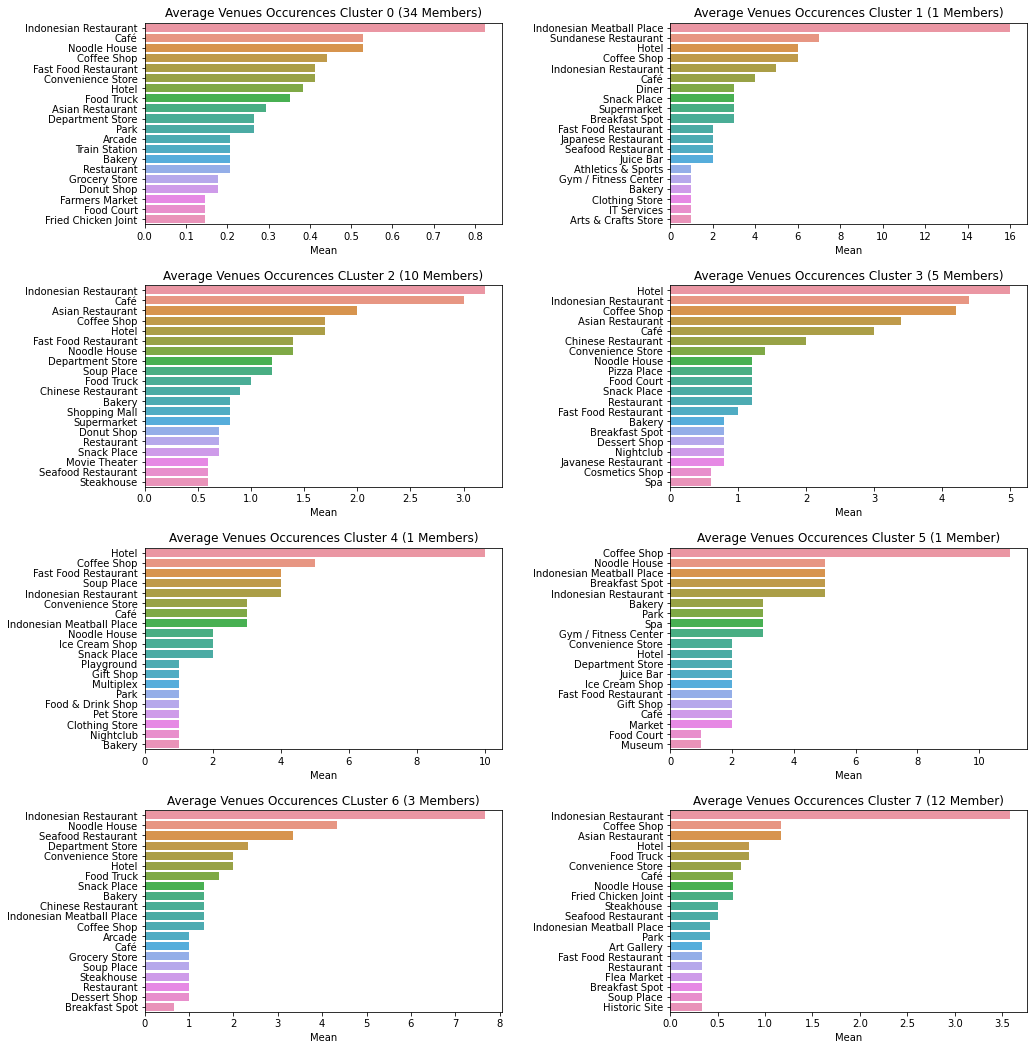

In [ ]:
fig, ax= plt.subplots(4,2,figsize=(15,15))
ax1=sns.barplot(y=c1_venue.index[0:20], x=c1_venue['Mean'][0:20],orient='h',ax=ax[0,0])
ax2=sns.barplot(y=c2_venue.index[0:20], x=c2_venue['Mean'][0:20],orient='h',ax=ax[0,1])
ax3=sns.barplot(y=c3_venue.index[0:20], x=c3_venue['Mean'][0:20],orient='h',ax=ax[1,0])
ax4=sns.barplot(y=c4_venue.index[0:20], x=c4_venue['Mean'][0:20],orient='h',ax=ax[1,1])
ax5=sns.barplot(y=c5_venue.index[0:20], x=c5_venue['Mean'][0:20],orient='h',ax=ax[2,0])
ax6=sns.barplot(y=c6_venue.index[0:20], x=c6_venue['Mean'][0:20],orient='h',ax=ax[2,1])
ax7=sns.barplot(y=c7_venue.index[0:20], x=c7_venue['Mean'][0:20],orient='h',ax=ax[3,0])
ax8=sns.barplot(y=c8_venue.index[0:20], x=c8_venue['Mean'][0:20],orient='h',ax=ax[3,1])
fig.tight_layout(pad=3)
ax1.title.set_text('Average Venues Occurences Cluster 0 (34 Members)')
ax2.title.set_text('Average Venues Occurences Cluster 1 (1 Members)')
ax3.title.set_text('Average Venues Occurences CLuster 2 (10 Members)')
ax4.title.set_text('Average Venues Occurences Cluster 3 (5 Members)')
ax5.title.set_text('Average Venues Occurences Cluster 4 (1 Members)')
ax6.title.set_text('Average Venues Occurences Cluster 5 (1 Member)')
ax7.title.set_text('Average Venues Occurences CLuster 6 (3 Members)')
ax8.title.set_text('Average Venues Occurences Cluster 7 (12 Member)')


**Let's plot the prices and listings for each cluster**

In [ ]:
c={'Cluster':[],'Max':[],'Min':[],'Mean Cluster Price':[],'Listings in Cluster':[]}
for n in range(8):
  df=final_dataset[final_dataset.Cluster==n]
  c['Cluster'].append(n)
  c['Max'].append(df.Mean_Price.max())
  c['Min'].append(df.Mean_Price.min())
  c['Mean Cluster Price'].append(df.Mean_Price.mean())
  c['Listings in Cluster'].append(df.Listings.sum())

In [ ]:
cluster_sum=pd.DataFrame(c)

In [ ]:
cluster_sum

Cluster           Max           Min  Mean Cluster Price  Listings in Cluster
0        0  6.970811e+10  1.700000e+08        7.156840e+09                 1559
1        1  2.033333e+09  2.033333e+09        2.033333e+09                    6
2        2  2.543056e+10  2.630000e+08        4.495081e+09                  501
3        3  9.343542e+09  2.912750e+08        3.932319e+09                   96
4        4  1.432482e+09  1.432482e+09        1.432482e+09                   87
5        5  6.907500e+08  6.907500e+08        6.907500e+08                    4
6        6  5.742803e+08  3.998636e+08        5.018025e+08                   74
7        7  3.006500e+10  2.352143e+08        4.491182e+09                  583

**Adjusting table**

In [ ]:
clustsumdict=pd.DataFrame([cluster_sum['Mean Cluster Price']/1000000,cluster_sum['Min']/1000000,cluster_sum['Max']/1000000])

In [ ]:
clustsumdict

0            1  ...           6             7
Mean Cluster Price   7156.840264  2033.333333  ...  501.802457   4491.181677
Min                   170.000000  2033.333333  ...  399.863636    235.214286
Max                 69708.112500  2033.333333  ...  574.280273  30065.000000

[3 rows x 8 columns]

In [ ]:
cd={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}
for n in range(8):
  for rows in clustsumdict[n]:
    cd[n].append(rows)

**Plot**

Text(0.5, 1.0, 'Listings in Lamudi.com')

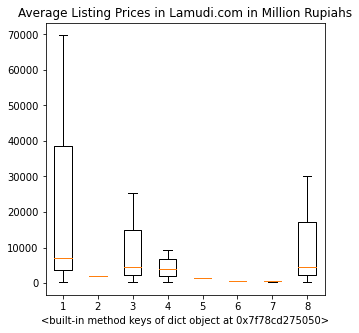

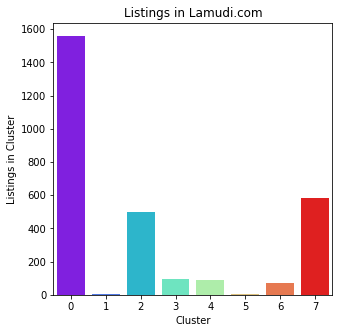

In [ ]:
fig,ax= plt.subplots(figsize=(5,5))
ax.boxplot(cd.values())
ax.set_xlabel(cd.keys)
plt.title('Average Listing Prices in Lamudi.com in Million Rupiahs')
fig1, ax1= plt.subplots(figsize=(5,5))
sns.barplot(x=cluster_sum.Cluster, y=cluster_sum['Listings in Cluster'],ax=ax1,palette=rainbow)
ax1.set_title('Listings in Lamudi.com')

**STEP 6 Combining it all**

**Let's put it all in the choropleth map**

In [ ]:
clo_dataset=final_dataset.drop(columns=['Unnamed: 0',	'Unnamed: 0.1','key_0']).iloc[:,:5]

In [ ]:
clo_dataset

Location  Listings  Latitude   Longitude    Mean_Price
0         Tangerang       402 -6.176031  106.638447  4.545191e+09
1   Jakarta Selatan       330 -6.283818  106.804863  9.785526e+09
2            Bekasi       259 -6.234986  106.994544  5.438207e+09
3           Bandung       240 -6.934469  107.604954  2.390222e+09
4             Bogor       229 -6.596299  106.797242  4.291715e+09
..              ...       ...       ...         ...           ...
62           Ciamis         3 -7.326661  108.353095  3.006500e+10
63           Madiun         3 -7.611888  111.673193  6.186667e+08
64         Lamongan         3 -7.122912  112.328216  2.275000e+08
65          Cilegon         3 -6.017389  106.053769  3.258333e+08
66            Maros         3 -4.965502  119.692843  1.700000e+08

[67 rows x 5 columns]

In [ ]:
clo_dataset['Mean_Price']=clo_dataset['Mean_Price']/1000000

**Making adjustment to fit with the GeoJson Location name**

In [ ]:
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Tangerang'].index,['Location']]='Kota Tangerang'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Pekanbaru'].index,['Location']]='Pekan Baru'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Lampung'].index,['Location']]='Lampung Utara'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Bekasi'].index,['Location']]='Kota Bekasi'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Bogor'].index,['Location']]='Kota Bogor'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Bandung'].index,['Location']]='Kota Bandung'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Tasikmalaya'].index,['Location']]='Kota Tasikmalaya'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Surakarta'].index,['Location']]='Kota Surakarta'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Surabaya'].index,['Location']]='Kota Surabaya'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Malang'].index,['Location']]='Kota Malang'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Sukabumi'].index,['Location']]='Kota Sukabumi'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Semarang'].index,['Location']]='Kota Semarang'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Solo'].index,['Location']]='Kota Solo'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Pasuruan'].index,['Location']]='Kota Pasuruan'
clo_dataset.loc[clo_dataset[clo_dataset.Location=='Blitar'].index,['Location']]='Kota Blitar'


**Initialize map variables**

In [ ]:
geojson_url='https://raw.githubusercontent.com/rifani/geojson-political-indonesia/master/IDN_adm_2_kabkota.json'

In [ ]:
geojson=requests.get(geojson_url).json()

In [ ]:
clo_map=folium.Map([IndoLat,IndoLon],zoom_start=7)

In [ ]:
np.linspace(cluster_sum['Min'].min(),cluster_sum['Max'].max(), 3)

array([1.70000000e+08, 3.49390562e+10, 6.97081125e+10])

**Plot Starts Here**

In [ ]:
clo_map.choropleth(geo_data=geojson,data=clo_dataset,columns=['Location','Mean_Price'],key_on='feature.properties.NAME_2',fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_color='white',
    nan_fill_opacity=0.9,
    legend_name='Housing Price Average (Millions Rupiahs)')

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
for cluster in [0,1,2,3,4,5,6,7]: 
  group = folium.FeatureGroup(name='<span style=\\"color: {0};\\">Cluster {1}</span>'.format(rainbow[cluster-1],cluster))
  for name,lat,lon, cluster in zip(final_dataset.Location,final_dataset.Latitude, final_dataset.Longitude, final_dataset.Cluster):
    labels=folium.Popup('{}\nCluster{}'.format(name,cluster),parse_html=True)
    folium.CircleMarker([lat,lon],fill=True,color=rainbow[cluster],fill_opacity=0.7,popup=labels).add_to(group)
  group.add_to(clo_map)
folium.map.LayerControl('topright',collapsed=False).add_to(clo_map) 

In [ ]:
title = 'Choropleth Map on Average Housing Price Based from Listings on Lamudi.com'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)  
clo_map.get_root().html.add_child(folium.Element(title_html))


In [ ]:
clo_map

**Thank you**